In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n)

In [2]:
def gauss(x, mu, S):
  return np.exp(-(x-mu)**2/(2*s**2))

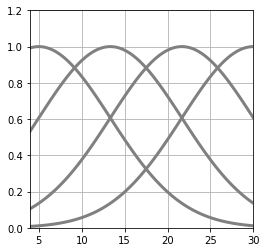

In [3]:
M=4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
  y = gauss(xb, mu[j], s)
  plt.plot(xb, y, color = 'gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


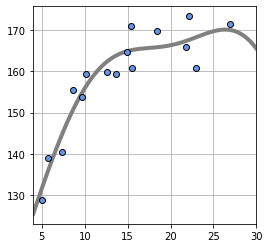

In [4]:
def gauss_func(w, x):
  m = len(w) - 1
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  y = np.zeros_like(x)
  for j in range(m):
    y = y + w[j] * gauss(x, mu[j], s)
  y = y + w[m]
  return y

def mse_gauss_func(x, t, w):
  y = gauss_func(w, x)
  mse = np.mean((y-t)**2)
  return mse

def fit_gauss_func(x, t, m):
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  n = x.shape[0]
  psi = np.ones((n, m+1))
  for j in range(m):
    psi[:,j] = gauss(x, mu[j], s)
  psi_T = np.transpose(psi)

  b = np.linalg.inv(psi_T.dot(psi))
  c = b.dot(psi_T)
  w = c.dot(t)

  return w

def show_gauss_func(w):
  xb = np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb, y, c=[.5, .5, .5], lw=4)

plt.figure(figsize=(4,4))
M=4
W=fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor= 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

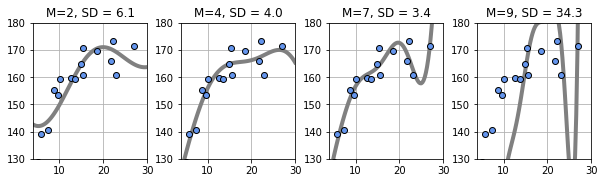

In [5]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i + 1)
  W = fit_gauss_func(X, T, M[i])
  show_gauss_func(W)
  plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
  plt.xlim(X_min, X_max)
  plt.grid(True)
  plt.ylim(130, 180)
  mse = mse_gauss_func(X, T, W)

  plt.title("M={0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

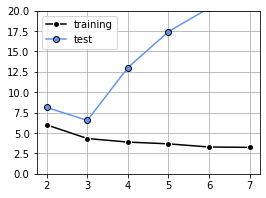

In [6]:
def kfold_gauss_func(x, t, m ,k):
  n = x.shape[0]
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)

  for i in range(0,k):
    x_train = x[np.fmod(range(n), k) != i]
    t_train = t[np.fmod(range(n), k) != i]
    x_test = x[np.fmod(range(n), k) == i]
    t_test = t[np.fmod(range(n), k) == i]
    wm = fit_gauss_func(x_train, t_train, m)
    mse_train[i] = mse_gauss_func(x_train, t_train, wm)
    mse_test[i] = mse_gauss_func(x_test, t_test, wm)
  return mse_train, mse_test

M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
  Cv_Gauss_train[:,i], Cv_Gauss_test[:,i]= kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize= (4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', color='k', markeredgecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()


SD=4.39cm


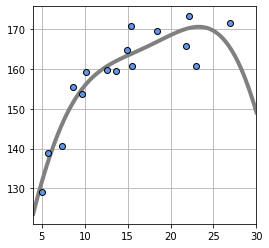

In [7]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()